In [72]:
import pandas
import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split

from imodels import GreedyRuleListClassifier

X, Y = sklearn.datasets.load_breast_cancer(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=4)

# NOTE: fitting sometimes fails with an Exception, or gives model with very bad performance
# Should attempt multiple fits and keep the best one, as estimated per a validation set
model = GreedyRuleListClassifier(max_depth=10)
model.fit(X_train, y_train, feature_names=X_train.columns)

y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test.values,y_pred)
print('Accuracy:\n', score)

print('Rule list:\n')
print(model)

Accuracy:
 0.631578947368421
Rule list:

mean 0.603 (398 pts)
if worst area >= 869.3 then 0.908 (262 pts)
mean 0.015 (136 pts)
if worst texture >= 16.67 then 1.0 (1 pts)
mean 0.007 (135 pts)
if area error >= 22.18 then 0.2 (5 pts)
mean 0 (130 pts)



In [73]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [74]:
print(model.rules_)

[{'col': 'worst area', 'index_col': 23, 'cutoff': 869.3, 'val': 0.6030150753768844, 'flip': True, 'val_right': 0.9083969465648855, 'num_pts': 398, 'num_pts_right': 262}, {'col': 'worst texture', 'index_col': 21, 'cutoff': 16.67, 'val': 0.014705882352941176, 'flip': True, 'val_right': 1.0, 'num_pts': 136, 'num_pts_right': 1}, {'col': 'area error', 'index_col': 13, 'cutoff': 22.18, 'val': 0.007407407407407408, 'flip': True, 'val_right': 0.2, 'num_pts': 135, 'num_pts_right': 5}, {'val': 0, 'num_pts': 130}]


             col  index_col  cutoff       val  flip  val_right  num_pts  \
0     worst area       23.0  869.30  0.603015  True   0.908397      398   
1  worst texture       21.0   16.67  0.014706  True   1.000000      136   
2     area error       13.0   22.18  0.007407  True   0.200000      135   
3            NaN        NaN     NaN  0.000000   NaN        NaN      130   

   num_pts_right  
0          262.0  
1            1.0  
2            5.0  
3            NaN  


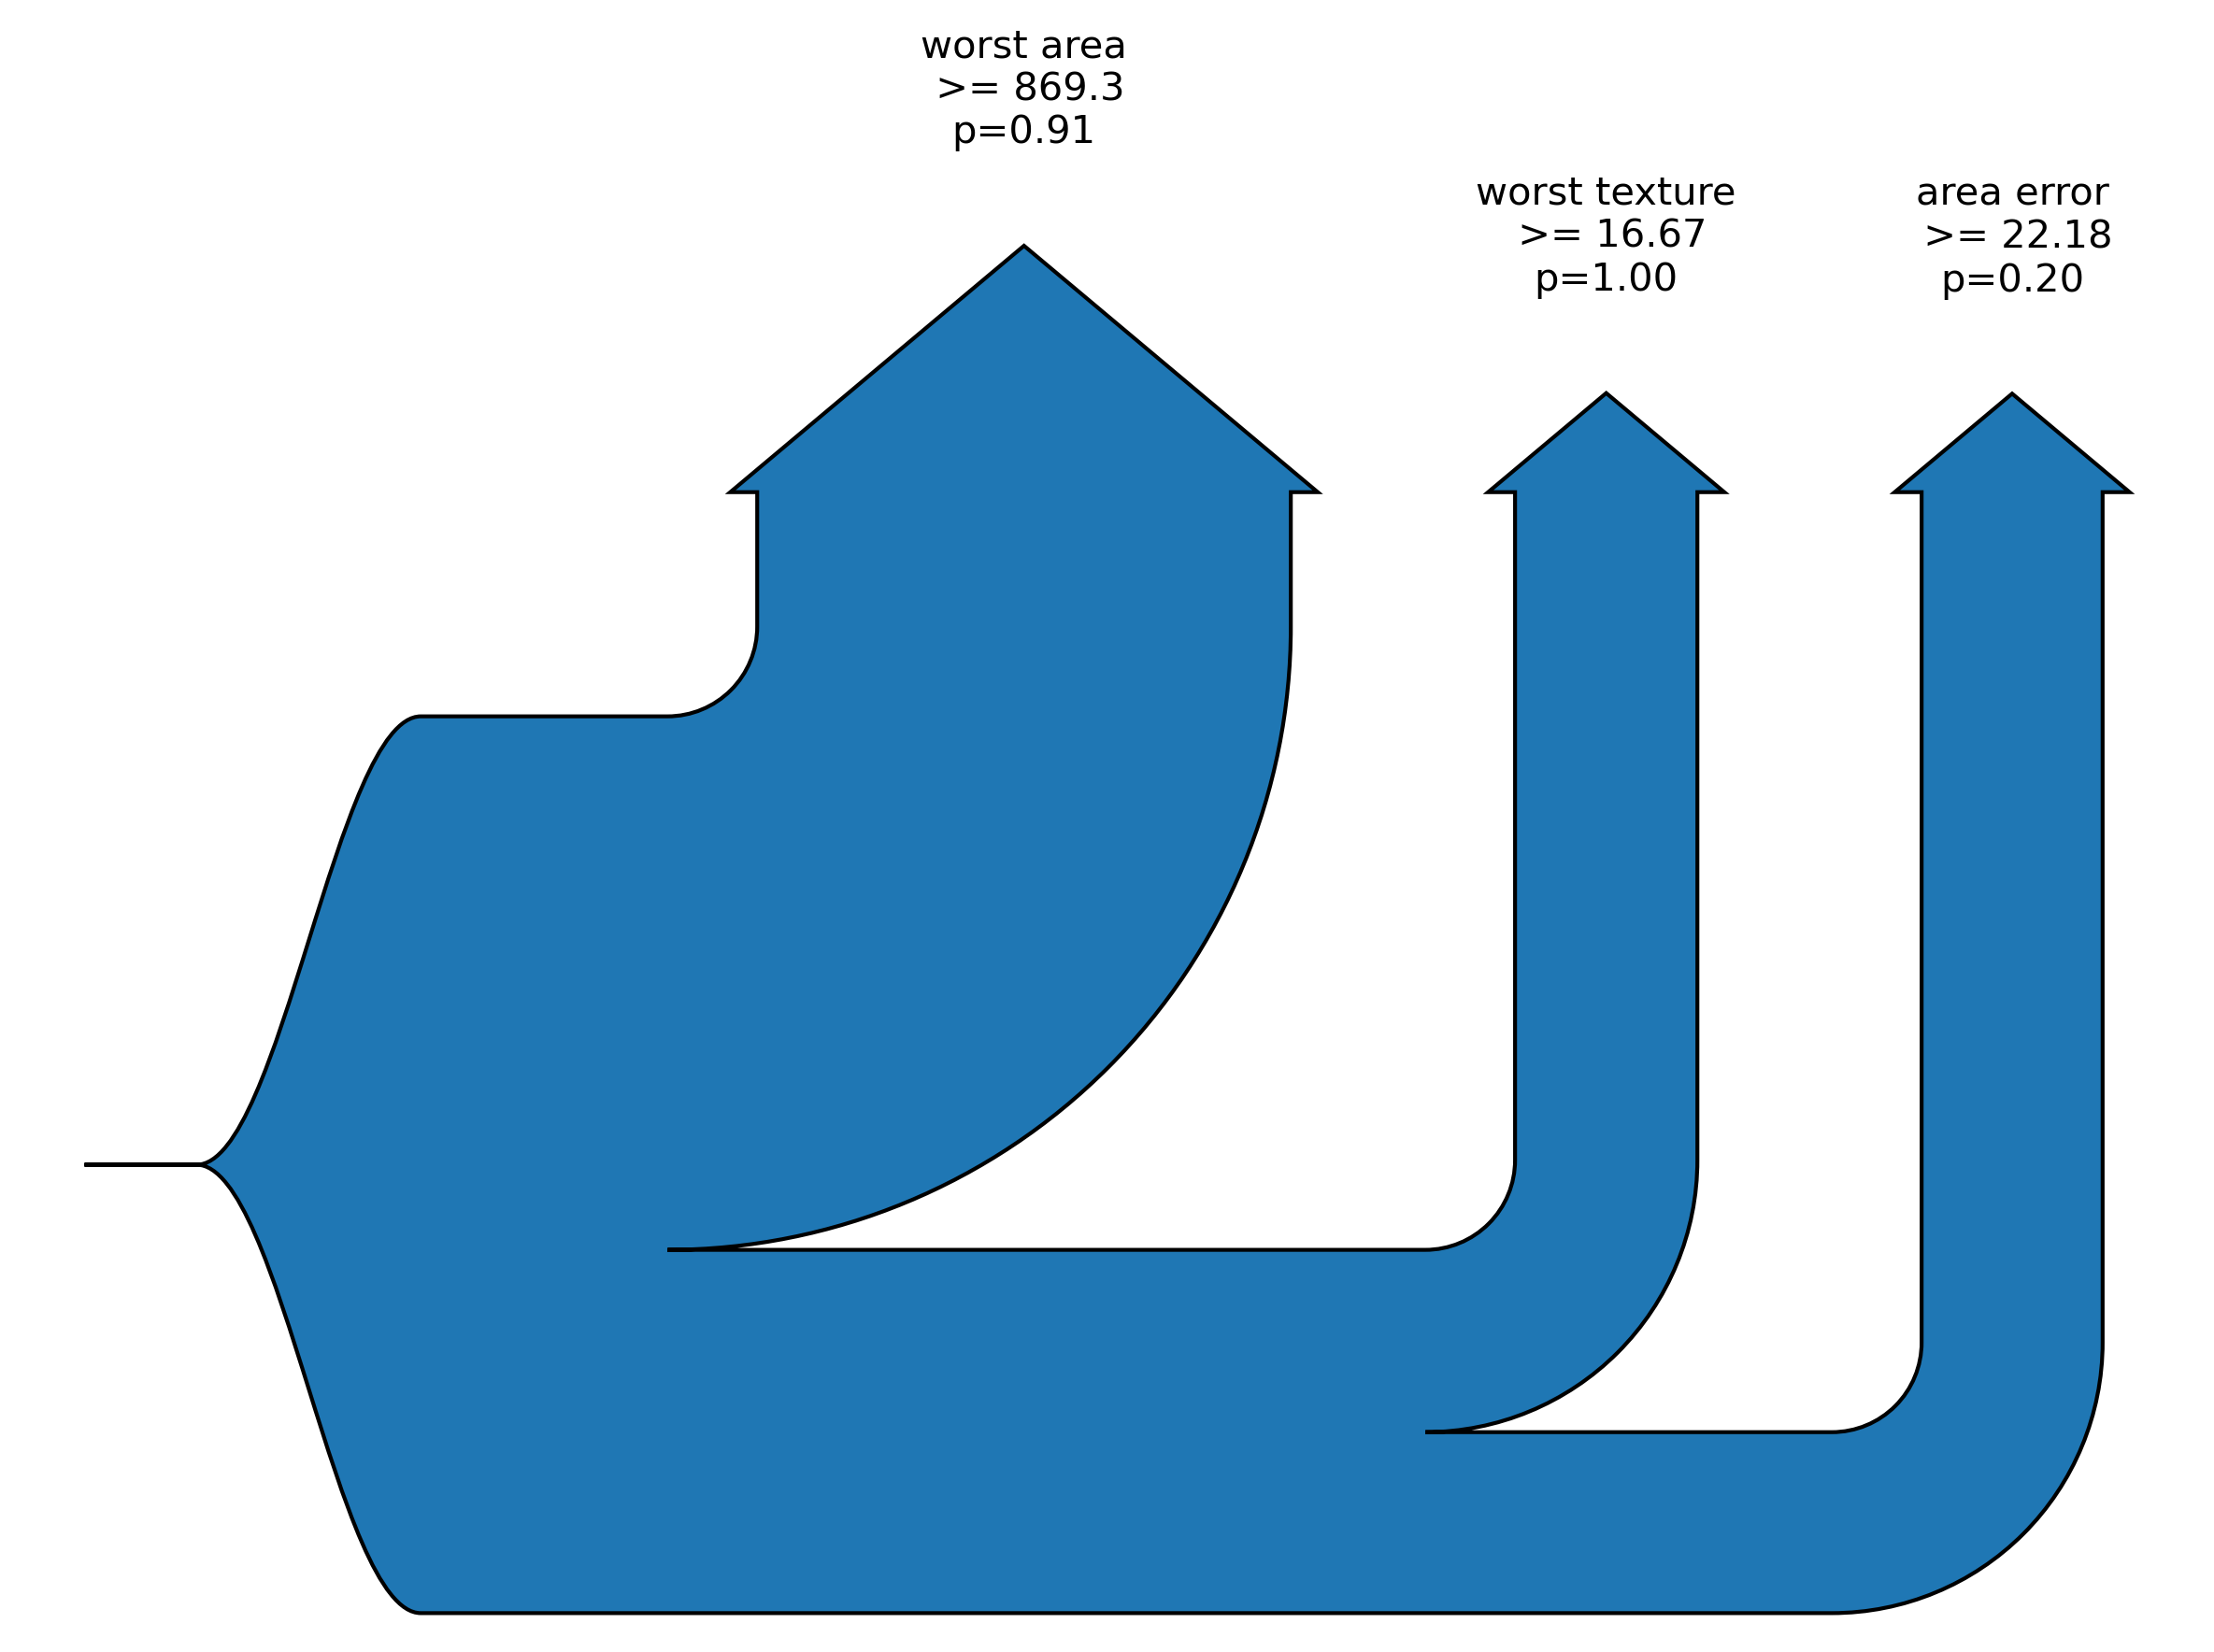

In [108]:

def plot_decision_rules_sankey(ax, rules):
    # https://matplotlib.org/stable/api/sankey_api.html
    # TODO: read the arguments
    

    from matplotlib.sankey import Sankey

    def format_rule(r):
        op = '>='
        s = f"{r['col']}\n {op} {r['cutoff']}\np={r['val_right']:.2f}"
        return s
    
    df = pandas.DataFrame.from_records(model.rules_)
    print(df)
    df = df.dropna()
    df['label'] = df.apply(format_rule, axis=1)
    df['orientation'] = [1] * len(df)
    df['out'] = df['num_pts'] / df['num_pts'].sum()

    p = Sankey(ax=ax,
       margin=0.0,
       format='',
       flows=[0.0] + list(df['out'] * -1),
       labels=['Input'] + list(df['label']),
       orientations=[0] + list(df['orientation']),
    ).finish()

    ax.axis('off')

from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, figsize=(8, 6))
plot_decision_rules_sankey(ax, model.rules_)
fig.tight_layout()
fig.savefig('decision-rules-sankey.png')